In [1]:
##Problem Statement
#Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

#Importing libs
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)




[]


In [3]:
#data_dir_train = pathlib.Path("../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
#data_dir_test = pathlib.Path("../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")
data_dir_train = pathlib.Path("Desktop/megh/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")

data_dir_test = pathlib.Path("Desktop/megh/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)




2239
118


Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Found 118 files belonging to 9 classes.
Using 106 files for validation.
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
(32, 180, 180, 3)
(32,)


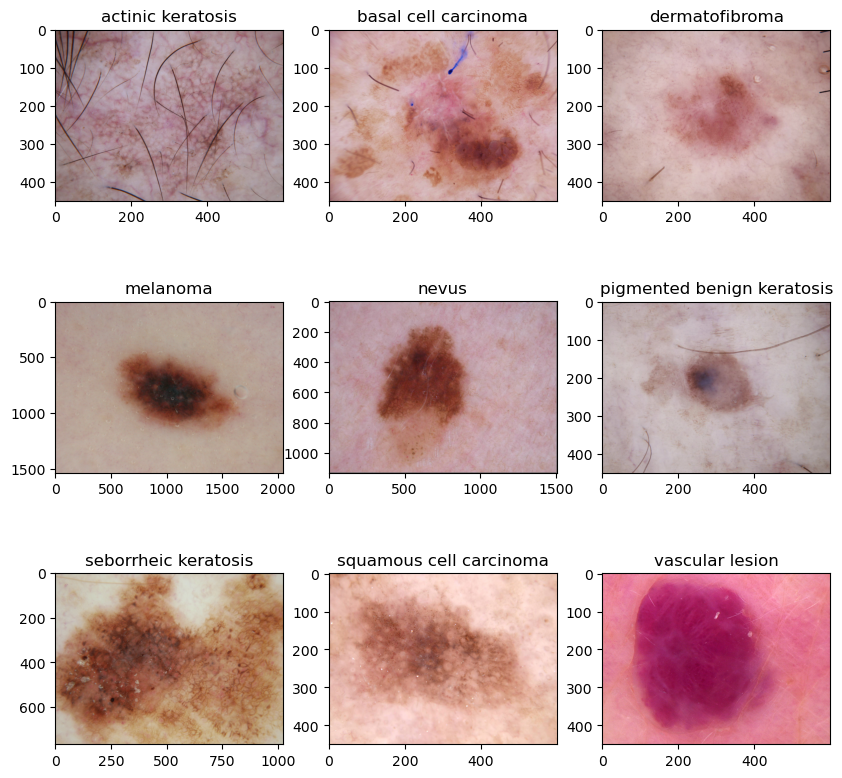

In [4]:
#Prepare the dataset
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


# DENSENET

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
   data_dir_train,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)



Found 2239 images belonging to 9 classes.
Found 2239 images belonging to 9 classes.


In [33]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
   data_dir_train,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

# Build the model
densenet = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
for layer in densenet.layers:
    layer.trainable = False
model = Sequential([
    densenet,
    Flatten(input_shape=(32,32,3)),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(9, activation="relu")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Found 2239 images belonging to 9 classes.
Found 2239 images belonging to 9 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_8 (Flatten)         (None, 50176)             0         
                                                                 
 dense_22 (Dense)            (None, 512)               25690624  
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                    

In [34]:
for layer in model.layers[:-15]:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
model.fit(train_generator, epochs=20, validation_data=val_generator)

# Evaluate the model on the test data


Epoch 1/20
70/70 [==============================] - 367s 5s/step - loss: 3.2871 - accuracy: 0.2108 - val_loss: 2.8483 - val_accuracy: 0.2528
Epoch 2/20
70/70 [==============================] - 307s 4s/step - loss: 2.9135 - accuracy: 0.2296 - val_loss: 2.8654 - val_accuracy: 0.1639
Epoch 3/20
70/70 [==============================] - 299s 4s/step - loss: 2.8760 - accuracy: 0.2693 - val_loss: 2.6588 - val_accuracy: 0.3819
Epoch 4/20
70/70 [==============================] - 235s 3s/step - loss: 2.7547 - accuracy: 0.3372 - val_loss: 2.6290 - val_accuracy: 0.3890
Epoch 5/20
70/70 [==============================] - 238s 3s/step - loss: 2.7194 - accuracy: 0.3470 - val_loss: 2.2841 - val_accuracy: 0.3908
Epoch 6/20
70/70 [==============================] - 241s 3s/step - loss: 2.4648 - accuracy: 0.3542 - val_loss: 2.3211 - val_accuracy: 0.3814
Epoch 7/20
70/70 [==============================] - 240s 3s/step - loss: 2.4005 - accuracy: 0.3859 - val_loss: 2.1763 - val_accuracy: 0.4466
Epoch 8/20
70

In [36]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

Found 118 images belonging to 9 classes.
4/4 [==============================] - 22s 5s/step
Confusion Matrix:
 [[ 0 14  0  2  0  0  0  0  0]
 [ 0 14  0  2  0  0  0  0  0]
 [ 0 14  0  2  0  0  0  0  0]
 [ 0  3  0 13  0  0  0  0  0]
 [ 0  3  0 13  0  0  0  0  0]
 [ 0 12  0  3  0  1  0  0  0]
 [ 0  0  0  3  0  0  0  0  0]
 [ 0 14  0  2  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.18      0.88      0.30        16
           2       0.00      0.00      0.00        16
           3       0.33      0.81      0.46        16
           4       0.00      0.00      0.00        16
           5       1.00      0.06      0.12        16
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        16
           8       1.00      0.33      0.50         3

    accuracy                           0.25       11

In [37]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

4/4 [==============================] - 16s 5s/step - loss: 3.7303 - accuracy: 0.2458
Test loss: 3.7303
Test accuracy: 0.2458


In [44]:
#Model 1 : standard Model
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling \
                    (1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))
opt = Adam(lr=0.001)
model.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()





Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 128)      

Epoch 1/25
56/56 [==============================] - 86s 1s/step - loss: 2.0297 - accuracy: 0.2059 - val_loss: 2.0505 - val_accuracy: 0.2774
Epoch 2/25
56/56 [==============================] - 72s 1s/step - loss: 1.8557 - accuracy: 0.3030 - val_loss: 1.6681 - val_accuracy: 0.4161
Epoch 3/25
56/56 [==============================] - 75s 1s/step - loss: 1.6710 - accuracy: 0.3783 - val_loss: 1.6257 - val_accuracy: 0.4206
Epoch 4/25
56/56 [==============================] - 75s 1s/step - loss: 1.5691 - accuracy: 0.4408 - val_loss: 1.5732 - val_accuracy: 0.4340
Epoch 5/25
56/56 [==============================] - 72s 1s/step - loss: 1.5572 - accuracy: 0.4520 - val_loss: 1.5735 - val_accuracy: 0.4541
Epoch 6/25
56/56 [==============================] - 71s 1s/step - loss: 1.4964 - accuracy: 0.4699 - val_loss: 1.5005 - val_accuracy: 0.5034
Epoch 7/25
56/56 [==============================] - 73s 1s/step - loss: 1.4063 - accuracy: 0.5045 - val_loss: 1.4577 - val_accuracy: 0.4832
Epoch 8/25
56/56 [==

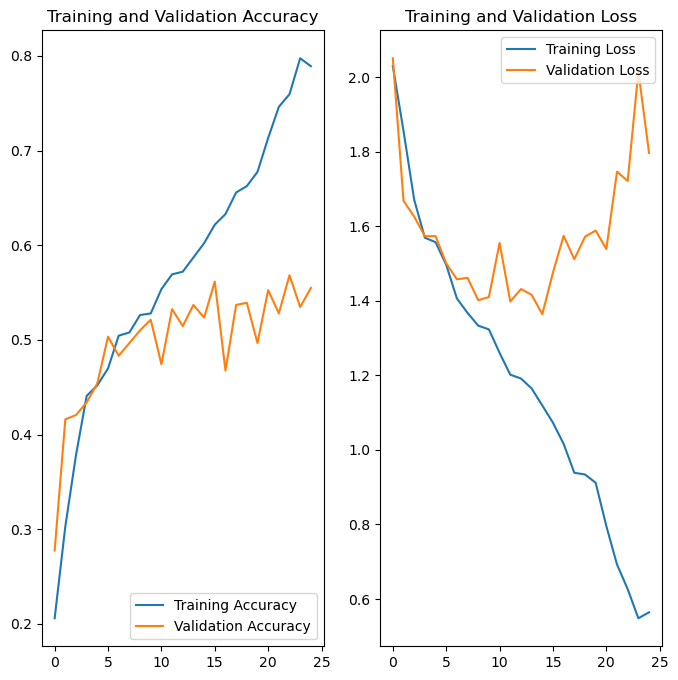

In [45]:
epochs=25

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


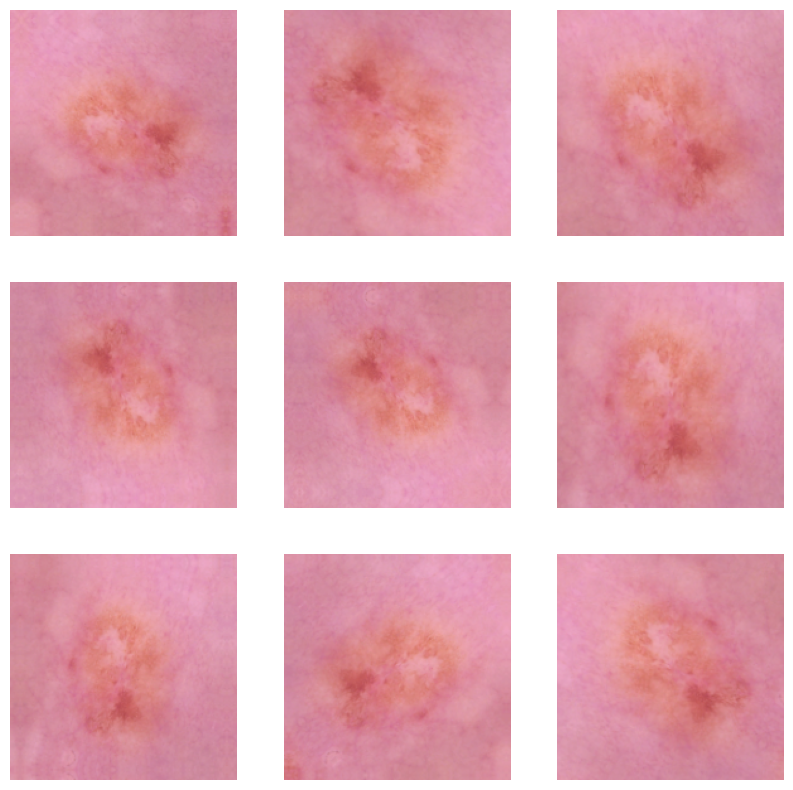

In [46]:
#Model 2 : Data Augumentation with drop out layer.
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

num_classes = 9
model = Sequential(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3)))

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




Epoch 1/25
56/56 [==============================] - 88s 1s/step - loss: 2.0533 - accuracy: 0.1959 - val_loss: 1.9724 - val_accuracy: 0.1924
Epoch 2/25
56/56 [==============================] - 82s 1s/step - loss: 1.8975 - accuracy: 0.2807 - val_loss: 1.7689 - val_accuracy: 0.3557
Epoch 3/25
56/56 [==============================] - 83s 1s/step - loss: 1.6948 - accuracy: 0.3756 - val_loss: 1.6207 - val_accuracy: 0.4094
Epoch 4/25
56/56 [==============================] - 88s 2s/step - loss: 1.6579 - accuracy: 0.4018 - val_loss: 1.6496 - val_accuracy: 0.4385
Epoch 5/25
56/56 [==============================] - 84s 1s/step - loss: 1.6122 - accuracy: 0.4280 - val_loss: 1.5286 - val_accuracy: 0.4407
Epoch 6/25
56/56 [==============================] - 85s 2s/step - loss: 1.5040 - accuracy: 0.4665 - val_loss: 1.4673 - val_accuracy: 0.5101
Epoch 7/25
56/56 [==============================] - 84s 1s/step - loss: 1.4219 - accuracy: 0.5050 - val_loss: 1.4941 - val_accuracy: 0.4877
Epoch 8/25
56/56 [==

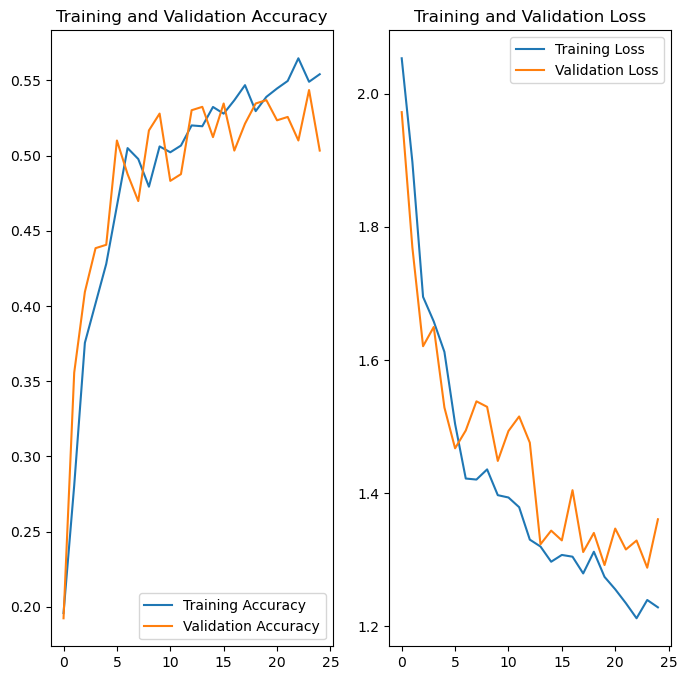

total training image count = 2239 

-------------------------------------
Class name =  actinic keratosis
count      =  114
proportion =  0.05091558731576597
-------------------------------------
Class name =  basal cell carcinoma
count      =  376
proportion =  0.16793211255024565
-------------------------------------
Class name =  dermatofibroma
count      =  95
proportion =  0.04242965609647164
-------------------------------------
Class name =  melanoma
count      =  438
proportion =  0.19562304600267977
-------------------------------------
Class name =  nevus
count      =  357
proportion =  0.15944618133095131
-------------------------------------
Class name =  pigmented benign keratosis
count      =  462
proportion =  0.20634211701652524
-------------------------------------
Class name =  seborrheic keratosis
count      =  77
proportion =  0.03439035283608754
-------------------------------------
Class name =  squamous cell carcinoma
count      =  181
proportion =  0.08083966056

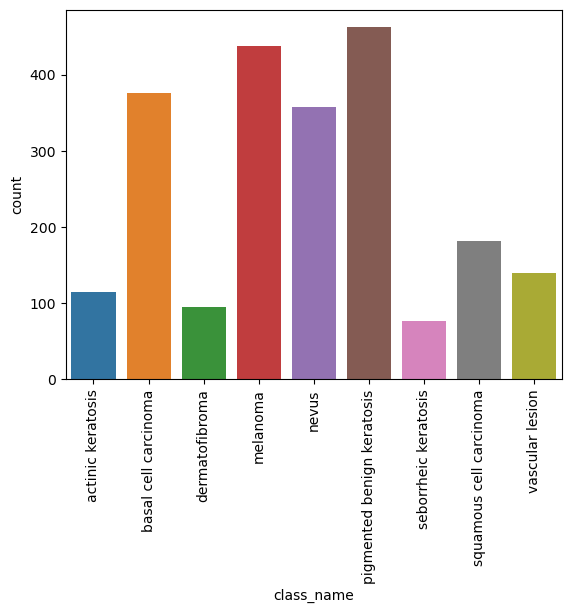

In [47]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


num_classes = len(class_names)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()
#total training image count = 2239

# Transformers

In [28]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 38.2/38.2 MB 4.8 MB/s eta 0:00:00


In [5]:
pip install torch==1.9.0 torchvision==0.10.0 torchaudio==0.9.0


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 222.0/222.0 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 920.7/920.7 kB 7.3 MB/s eta 0:00:00
     -------------------------------------- 215.3/215.3 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# Define the path to the dataset
data_path = "Desktop/megh/Skin cancer ISIC The International Skin Imaging Collaboration/"

# Define the transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load the dataset
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Split the dataset into training and validation sets
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), len(dataset)-int(len(dataset)*0.8)])

# Define the data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load a pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)

# Replace the last fully-connected layer with a new one that has 2 output classes (melanoma and nevus)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        train_correct += torch.sum(preds == labels.data)
    train_loss = train_loss / len(train_loader.dataset)
    train_acc = train_correct.double() / len(train_loader.dataset)

    # Evaluate the model on the validation set
    val_loss = 0.0
    val_correct = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += torch.sum(preds == labels.data)
    val_loss = val_loss / len(val_loader.dataset)
    val_acc = val_correct.double() / len(val_loader.dataset)

    # Print the loss and accuracy for this epoch
    print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, train_acc, val_loss, val_acc))

# Compute the overall accuracy on the test set
test_dataset = datasets.ImageFolder(root=data_path + "/test", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

test_correct = 0.0
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_correct += torch.sum(preds == labels.data)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\megha/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Epoch [1/10], Train Loss: 0.2519, Train Acc: 0.9432, Val Loss: 0.2190, Val Acc: 0.9470
Epoch [2/10], Train Loss: 0.1980, Train Acc: 0.9507, Val Loss: 0.2022, Val Acc: 0.9470
Epoch [3/10], Train Loss: 0.1847, Train Acc: 0.9507, Val Loss: 0.2040, Val Acc: 0.9470
Epoch [4/10], Train Loss: 0.1767, Train Acc: 0.9507, Val Loss: 0.2085, Val Acc: 0.9470
Epoch [5/10], Train Loss: 0.1678, Train Acc: 0.9523, Val Loss: 0.2248, Val Acc: 0.9449
Epoch [6/10], Train Loss: 0.1552, Train Acc: 0.9528, Val Loss: 0.2063, Val Acc: 0.9428
Epoch [7/10], Train Loss: 0.1266, Train Acc: 0.9613, Val Loss: 0.2694, Val Acc: 0.9470
Epoch [8/10], Train Loss: 0.1119, Train Acc: 0.9639, Val Loss: 0.2951, Val Acc: 0.9492
Epoch [9/10], Train Loss: 0.1093, Train Acc: 0.9597, Val Loss: 0.4883, Val Acc: 0.9470
Epoch [10/10], Train Loss: 0.1344, Train Acc: 0.9538, Val Loss: 0.3067, Val Acc: 0.9513


In [24]:
print(inputs.size())

torch.Size([22, 3, 224, 224])


In [7]:
# Compute the overall accuracy on the test set
test_dataset = datasets.ImageFolder(root=data_path + "/test", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

test_correct = 0.0
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_correct += torch.sum(preds == labels.data)

In [8]:
print(test_correct)

tensor(17.)


In [9]:
print(preds)

tensor([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])


In [11]:
accuracy = 100 * test_correct /preds 
#print('Accuracy on the test set: {:.2f}%'.format(accuracy))

In [12]:
accuracy

tensor([1700., 1700., 1700., 1700.,   inf,   inf,   inf,   inf, 1700., 1700.,
        1700., 1700., 1700., 1700., 1700., 1700.,   inf, 1700., 1700., 1700.,
        1700., 1700.])

In [17]:
test_dataset = datasets.ImageFolder(root=data_path + "/test", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
model.eval()
correct = 0
total = 0

# Iterate over the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        # Make predictions on the batch of images
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Update the accuracy counter
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate the final accuracy
accuracy = 100 * correct/total
print('Accuracy on the test set: {:.2f}%'.format(accuracy))

Accuracy on the test set: 60.71%


In [27]:
pip install --upgrade onnx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import torch
import torchvision

# Define the PyTorch model
model = torchvision.models.resnet18(pretrained=True)

# Save the model to a file
output_path = "model.pt"
torch.save(model.state_dict(), output_path)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\megha/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [31]:
import torch
import torchvision

# Define the PyTorch model
model = torchvision.models.resnet18(pretrained=False)

# Load the saved model state dictionary
input_path = "model.pt"
model.load_state_dict(torch.load(input_path))

# Use the model for inference


<All keys matched successfully>